In [3]:
pip install matplotlib pytrends plotly seaborn pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from pytrends.request import TrendReq

# 1. Setting up Pytrends
# 2. Defining Keyword

In [5]:
pytrend = TrendReq(hl = 'en-US', tz = 360)  #language and timezone as parameters
keyword = "cybersecurity"

# Data Request

In [5]:
pytrend.build_payload([keyword], cat=0, timeframe = 'today 12-m', geo='', gprop='') #cat=0 means no specific category
# timeframe taken is last 6 months. no specific geographic location. gprop = '' means only google specific data

# Country Wise Interest in the Keyword

In [6]:
region_data = pytrend.interest_by_region()
region_data = region_data.sort_values(by = keyword, ascending = False).head(15) # top 15 countries data in descending order

C:\Users\PMLS\AppData\Local\Temp\ipykernel_14508\1973859135.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = region_data[keyword], y = region_data.index, palette = "Greens_d")


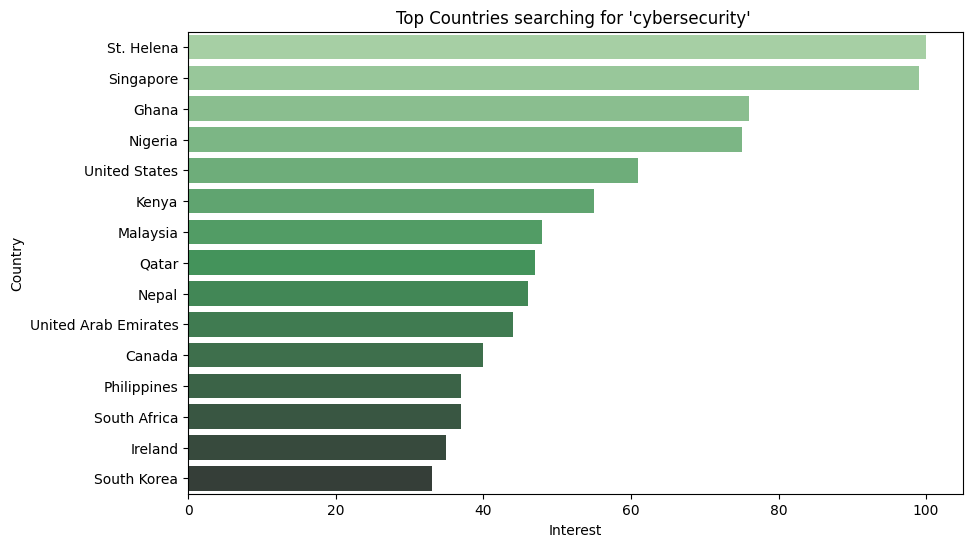

In [7]:
plt.figure(figsize = (10,6))
sns.barplot(x = region_data[keyword], y = region_data.index, palette = "Greens_d")
plt.title(f"Top Countries searching for '{keyword}' ")
plt.xlabel ("Interest")
plt.ylabel("Country")
plt.show()

# World Map showing Search Interest

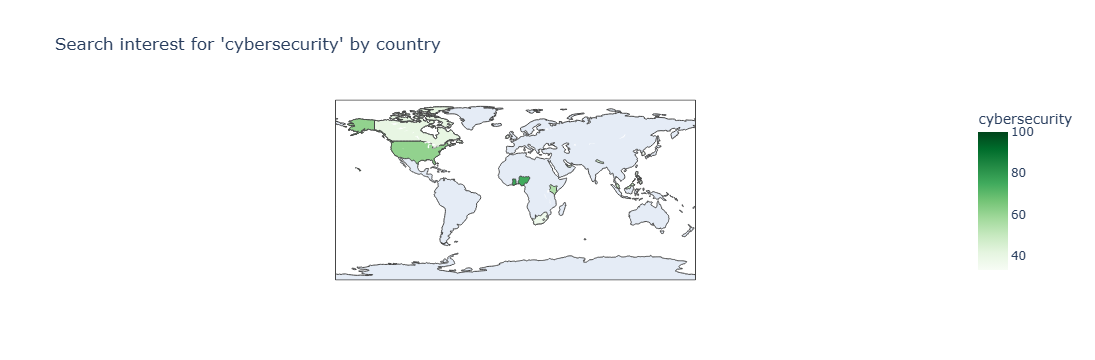

In [8]:
region_data = region_data.reset_index()
map_fig = px.choropleth(region_data,
                        locations = 'geoName',
                        locationmode = 'country names',
                        color = keyword,
                        title = f"Search interest for '{keyword}' by country",
                        color_continuous_scale='Greens')
map_fig.show()

In [9]:
time_df = pytrend.interest_over_time()

C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



# Time Wise Interest

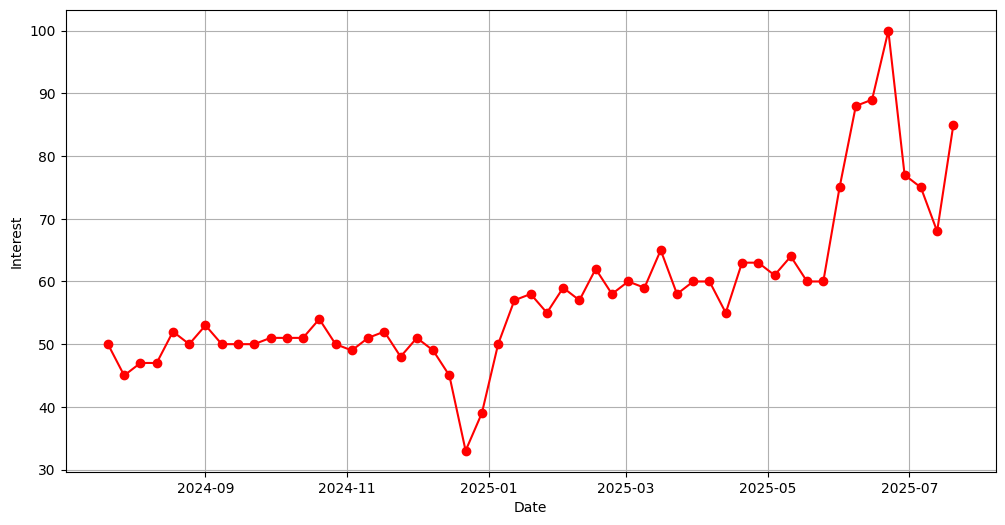

In [10]:
plt.figure(figsize = (12,6))
plt.plot(time_df.index, time_df[keyword], marker = 'o', color = 'red')
plt.title = (f"Search interest over time '{keyword}' ")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# Comparison with multiple keywords

In [6]:
keywords_list = ["cybersecurity", "programming", "blockchain"]
pytrend.build_payload(keywords_list, cat=0, timeframe='today 12-m', geo='', gprop='')

C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


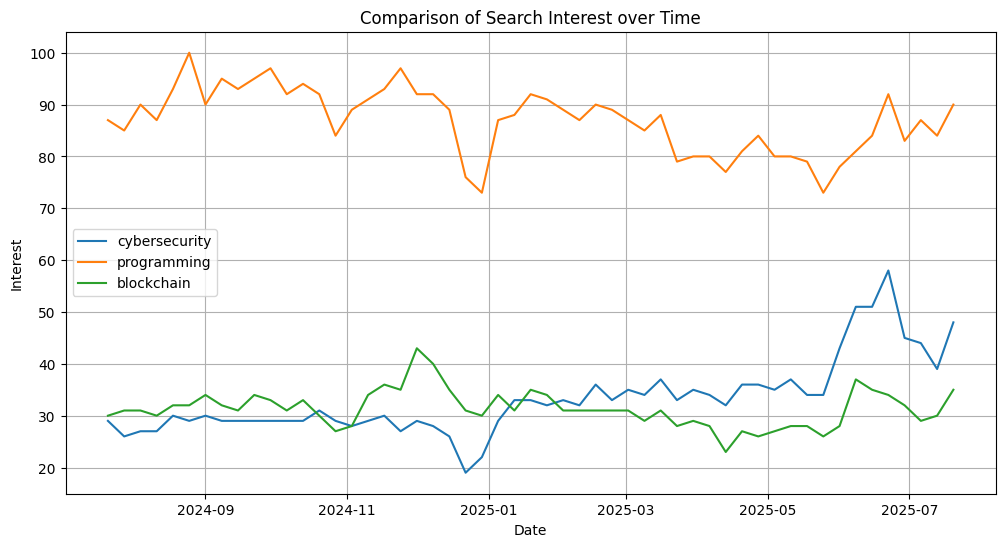

In [7]:
compare_df = pytrend.interest_over_time()
plt.figure(figsize=(12,6))
for keyword in keywords_list:
    plt.plot(compare_df.index, compare_df[keyword], label = keyword)
plt.title('Comparison of Search Interest over Time')
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.show()